# Support Vector Machine Intuition

**Some examples on how this SVC (Pegasos) works**

In [25]:
import numpy as np
import matplotlib.pyplot as plt

import svm

### Dataset

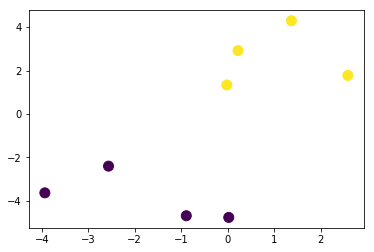

In [17]:
size = 4
# blob 1
x = np.random.normal(2,2,(size))
y = np.random.normal(2,1,(size))-x/4
# blob 2
x = np.concatenate((x,np.random.normal(-1,2,(size))))
y = np.concatenate((y,np.random.normal(-4,1,(size))))

# add xy together, add intercept 
X = np.hstack((np.ones(2*size),x,y)).reshape(3,2*size).T
# reuse y for flags
y[:size] = 1
y[size:] = -1

plt.scatter(X[:,1],X[:,2],c=y,s=100)
plt.show()

### Fitting

In [26]:
# start with a random line
w_0 = np.asarray([0.3,0.7,0.3])

**The update rule does the following:**

mismatch:<br>
&emsp;`w-=learning_rate*(w/epoch-C*x*y[i])`
   <br>
match:<br>
&emsp;`w*=(1-learning_rate/epoch)`
<br><br>
`C*x*y` updates based on the datapoint. Let's examine this effect

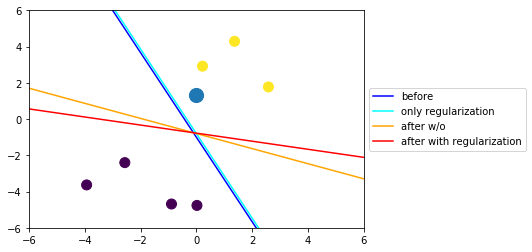

In [21]:
    i = 3

    # original
    w = w_0
    xx = np.arange(-8,8,1)
    yy=(-w[0]-w[1]*xx)/w[2]
    plt.plot(xx,yy,c='b',label='before')

    # 50% regularization (only happens very early)
    w = w_0 * 0.5
    xx = np.arange(-8,8,1)
    yy=(-w[0]-w[1]*xx)/w[2]+0.2
    plt.plot(xx,yy,c='cyan',label='only regularization')
    
    # after w/o
    w = w_0 + X[i]*y[i]
    xx = np.arange(-8,8,1)
    yy=(-w[0]-w[1]*xx)/w[2]
    plt.plot(xx,yy,c='orange',label='after w/o')    
    
    # after with reg
    w = w_0 - (w_0*0.5 - X[i]*y[i])
    xx = np.arange(-8,8,1)
    yy=(-w[0]-w[1]*xx)/w[2]
    plt.plot(xx,yy,c='r',label='after with regularization')

    plt.scatter(X[:,1],X[:,2],c=y,s=100)
    plt.scatter(X[i,1],X[i,2],s=200)  
    plt.ylim(-6,6)
    plt.xlim(-6,6)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

As can be seen, the regularization alone has no effect on the line.
<br>
The `x*y` update 'pushes' the line away from the datapoint (treat the point as a mismatch for the sake of the description)

The effect of the regularization becomes apparent. It gives a smaller weight to the current line and thus a bigger effect to the mismatch correction - visualized by how the line is 'pushed' further away when regularization occurs

**Same for points on the other side of the graph**

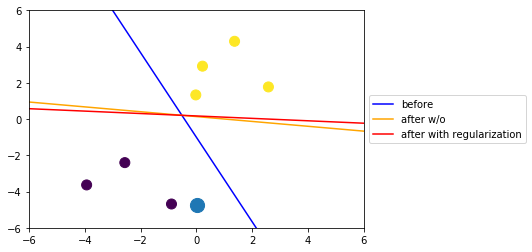

In [23]:
    w_0 = np.asarray([0.3,0.7,0.3])
    i = 6
    xx = np.arange(-8,8,1)

    # original
    w = w_0
    yy=(-w[0]-w[1]*xx)/w[2]
    plt.plot(xx,yy,c='b',label='before')
    
    # after w/o
    w = w_0 + X[i]*y[i]
    yy=(-w[0]-w[1]*xx)/w[2]
    plt.plot(xx,yy,c='orange',label='after w/o')    
    
    # after with reg
    w = w_0 - (w_0*0.5 - X[i]*y[i])
    yy=(-w[0]-w[1]*xx)/w[2]
    plt.plot(xx,yy,c='r',label='after with regularization')

    plt.scatter(X[:,1],X[:,2],c=y,s=100)
    plt.scatter(X[i,1],X[i,2],s=200)  
    plt.ylim(-6,6)
    plt.xlim(-6,6)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()